This is an example of using AutoMol:
- Training dataset: QM9
- Training features: fingerprints
- Feature to learn: HOMO energy
- Model: RandomForest
- Problem: regression
- Dataset location: local
- Hyper parameter: GridSearchCV
- CV: 5
- No custom features

In [1]:
if'automol'in globals(): import importlib; importlib.reload(automol)

In [2]:
from automol.pipeline import Pipeline

In [3]:
config_yaml = 'qm9_dataset_example_5.yaml'
pipeline = Pipeline(config_yaml)
pipeline.print_spec()

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amount: 200
cv: 5
dataset_class: QM9
dataset_location: data/dsgdb9nsd
dataset_split_test_size: 0.1
features:
- fingerprint
hyper_param_grid:
  RandomForestRegressor:
    max_depth:
    - 3
    - 5
    - 10
label: homo
mlflow_experiment: qm9_dataset_automol_demo
models_filter:
- git_uri: sklearn
  model_names:
  - RandomForestRegressor
  whitelist: 1
problem: regression
train_test_splits: 2



In [4]:
pipeline.train()

Got the feature homo from the current dataset.
Checking if the feature fingerprint can be generated.
Got the generated feature fingerprint.
Running model RandomForestRegressor with feature fingerprint.


2021/03/16 21:27:14 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/92ce07b058d04833a5549c991fecb550/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
2021/03/16 21:27:18 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/92ce07b058d04833a5549c991fecb550/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, c

Running model RandomForestRegressor with feature fingerprint.


2021/03/16 21:27:47 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/0f2171f1169b41e99b6e5bc5d18c3199/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
2021/03/16 21:27:50 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/0f2171f1169b41e99b6e5bc5d18c3199/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, c

In [5]:
pipeline.get_statistics()

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,feature,split_index,training_mae,training_mse,training_r2_score,test_mae,test_mse,test_r2_score,best_cv_score,training_rmse,training_score
0,RandomForestRegressor,fingerprint,0,0.006186,0.000082,0.846003,0.015389,0.000427,0.168341,0.088496,0.009071,0.846003
1,RandomForestRegressor,fingerprint,1,0.006569,0.000085,0.845606,0.011206,0.000228,0.314397,0.140634,0.009238,0.845606


In [6]:
pipeline.get_cv_results('RandomForestRegressor', 'fingerprint', split_index=0)

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.525036,0.003593,0.006284,0.000045,3,{'max_depth': 3},-0.464016,0.021514,-0.030583,0.228916,0.004184,-0.047997,0.226985,3
1,0.833126,0.006953,0.006298,0.000121,5,{'max_depth': 5},-0.325525,0.004255,0.086558,0.258540,0.154776,0.035721,0.198945,2
2,1.542243,0.073026,0.007811,0.001408,10,{'max_depth': 10},-0.325432,0.028571,0.257484,0.281611,0.200248,0.088496,0.225063,1


/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


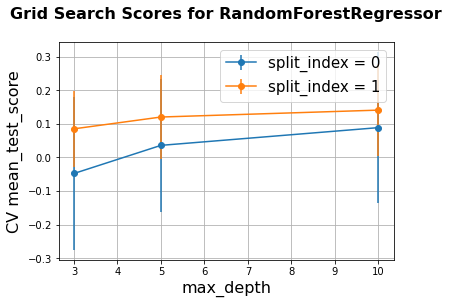

In [8]:
pipeline.plot_grid_search('RandomForestRegressor', 'fingerprint', 'max_depth')